# Tasks - 

1. Normalize case
2. Tokenize (using word_tokenize from NLTK)
3. POS tagging using the NLTK pos tagger
4. For the topic model, we would want to include only nouns
 - First, find out all the POS tags that correspond to nouns
 - Limit the data to only terms with these tags
5. Lemmatize (you want different forms of the terms to be treated as one, don't worry about providing POS tag to lemmatizer for now)
6. Remove stop words and punctuation (if there are any at all after the POS tagging)
7. Create a topic model using LDA on the cleaned up data with 12 topics
 - choose the topic model parameters carefully
 - what is the perplexity of the model?
 - what is the coherence of the model?
8. Analyze the topics, which pairs of topics can be combined?
9. Create topic model using LDA with what you think is the optimal number of topics
 - choose the topic model parameters carefully
 - is the perplexity better now?
 - is the coherence better now?
10. The business finally needs to be able to interpret the topics
 - name each of the identified topics
 - create a table with the topic name and the top 10 terms in each to present to business

#### Some code to get you started

In [117]:
import warnings
warnings.filterwarnings("ignore")

# Importing the usual utilities
import numpy as np, pandas as pd
import re, random, os, string

from pprint import pprint #pretty print

#### Reading in the reviews file

In [118]:
reviews0 = pd.read_csv("../input/K8 Reviews v0.2.csv")
reviews0.head()

sentiment                                             review
0          1             Good but need updates and improvements
1          0  Worst mobile i have bought ever, Battery is dr...
2          1  when I will get my 10% cash back.... its alrea...
3          1                                               Good
4          0  The worst phone everThey have changed the last...

In [119]:
pd.value_counts(reviews0['sentiment'])
#This is quite a balanced dataset

0    7712
1    6963
Name: sentiment, dtype: int64

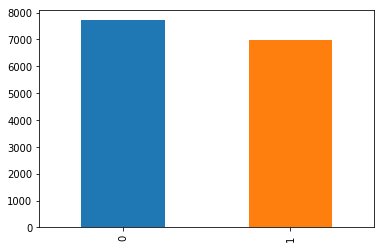

In [120]:
pd.value_counts(reviews0['sentiment']).plot.bar()

## Task 1. Normalize case

In [121]:
#Making everthing in lower case
normal_review=[x.lower() for x in reviews0.review]

In [122]:
# removing the reviews which has length less than 10 as smaller reviews usually don't contribute much to analysis
normal_review=[x for x in normal_review if len(x)>10]
normal_review[:10]

['good but need updates and improvements',
 "worst mobile i have bought ever, battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if i put mobile idle its getting discharged.this is biggest lie from amazon & lenove which is not at all expected, they are making full by saying that battery is 4000mah & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.don't know how lenovo will survive by making full of us.please don;t go for this else you will regret like me.",
 'when i will get my 10% cash back.... its already 15 january..',
 'the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone .highly disappointing of amazon',
 "only i'm telling don't buyi'm totally disappointedpoor batterypoor camerawaste of money",
 'phone is awesome. but while charging, it heats up allot..really a genuine reason to hate lenovo k8 note',
 'the battery level has worn down',
 "it's over hi

## Task 2. Tokenize (using word_tokenize from NLTK)

In [123]:
from nltk.tokenize import word_tokenize

In [124]:
token_review=[word_tokenize(x) for x in normal_review]

In [125]:
token_review[:10]

[['good', 'but', 'need', 'updates', 'and', 'improvements'],
 ['worst',
  'mobile',
  'i',
  'have',
  'bought',
  'ever',
  ',',
  'battery',
  'is',
  'draining',
  'like',
  'hell',
  ',',
  'backup',
  'is',
  'only',
  '6',
  'to',
  '7',
  'hours',
  'with',
  'internet',
  'uses',
  ',',
  'even',
  'if',
  'i',
  'put',
  'mobile',
  'idle',
  'its',
  'getting',
  'discharged.this',
  'is',
  'biggest',
  'lie',
  'from',
  'amazon',
  '&',
  'lenove',
  'which',
  'is',
  'not',
  'at',
  'all',
  'expected',
  ',',
  'they',
  'are',
  'making',
  'full',
  'by',
  'saying',
  'that',
  'battery',
  'is',
  '4000mah',
  '&',
  'booster',
  'charger',
  'is',
  'fake',
  ',',
  'it',
  'takes',
  'at',
  'least',
  '4',
  'to',
  '5',
  'hours',
  'to',
  'be',
  'fully',
  'charged.do',
  "n't",
  'know',
  'how',
  'lenovo',
  'will',
  'survive',
  'by',
  'making',
  'full',
  'of',
  'us.please',
  'don',
  ';',
  't',
  'go',
  'for',
  'this',
  'else',
  'you',
  'will

## Task 3. POS tagging using the NLTK pos tagger

Check out the POS tagging chapter from the NLTK book

http://www.nltk.org/book/ch05.html

Examples - 

In [126]:
from nltk import pos_tag

In [127]:
pos_tokens=[pos_tag(tokens) for tokens in token_review]

In [ ]:
pos_tokens

In [128]:
len(pos_tokens[0])

6

## Task 4. For the topic model, we would want to include only nouns
 - First, find out all the POS tags that correspond to nouns
 - Limit the data to only terms with these tags


You see that for each term, the POS taggger returns a tuple. The first element of the tuple being the term, the second being the tag.

In [ ]:
import nltk
tagged_tuple = nltk.pos_tag(['great'])

tagged_tuple[0]

In [ ]:
pprint(tagged_tuple[0][0])
pprint(tagged_tuple[0][1])

In [ ]:
pos_tokens[1]

In [134]:
len(pos_tokens)

13094

In [ ]:
# To take only nouns from the tokens and make a corpus
"""nouns_tokens=[]
for pos in pos_tokens:
    for n in pos:
        if n[1].startswith('NN'):
            nouns_tokens.append(n[0])
"""


In [135]:
nouns_tokens=[]
for i in range(len(pos_tokens)):
    nouns_tokens.append([])

In [136]:
len(nouns_tokens)

13094

In [137]:
#nouns_tokens=[]
for i in range(len(pos_tokens)):
    for n in pos_tokens[i]:
        if n[1].startswith('NN'):
            nouns_tokens[i].append(n[0])

In [138]:
len(nouns_tokens)

13094

In [139]:
doc_complete=[' '.join(map(str,my_list)) for my_list in nouns_tokens]
doc_complete

['updates improvements',
 'mobile i battery hell backup hours uses idle discharged.this lie amazon lenove battery charger hours don',
 'i % cash january..',
 'phone everthey phone problem amazon phone amazon',
 'camerawaste money',
 'phone reason k8',
 'battery level',
 'problems phone hanging problems note station ahmedabad years phone lenovo',
 'lot glitches thing options',
 'phone charger damage months',
 'item battery life',
 'i battery problem motherboard problem months mobile life',
 'phone slim battry backup screen',
 'headset',
 'time i',
 'product prize range specification comparison mobile range i phone seal i credit card i .. deal amazon..',
 'battery solutions battery life',
 'smartphone',
 'galery problem speaker phone',
 'camera speed.excellent features.excelent battery',
 'product',
 'product camera os battery phone..it product lenovo..',
 'options cast screen wifi call option mobile hotspot',
 'phone usb cable',
 'phone price mobile lenovo display',
 'specifications fun

In [140]:
len(doc_complete)

13094

You'll need to extract the tag from the resulting tuple, of course and then limit to the desired tags

**I am making a function to perform all document cleaning and lemmatizing functions**

In [156]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = stopwords.words('english')+['h','hi','ho']
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split() if word.isalpha())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]

In [157]:
doc_clean

[['update', 'improvement'],
 ['mobile',
  'battery',
  'hell',
  'backup',
  'hour',
  'us',
  'idle',
  'dischargedthis',
  'lie',
  'amazon',
  'lenove',
  'battery',
  'charger',
  'hour'],
 ['cash', 'january'],
 ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon'],
 ['camerawaste', 'money'],
 ['phone', 'reason'],
 ['battery', 'level'],
 ['problem',
  'phone',
  'hanging',
  'problem',
  'note',
  'station',
  'ahmedabad',
  'year',
  'phone',
  'lenovo'],
 ['lot', 'glitch', 'thing', 'option'],
 ['phone', 'charger', 'damage', 'month'],
 ['item', 'battery', 'life'],
 ['battery', 'problem', 'motherboard', 'problem', 'month', 'mobile', 'life'],
 ['phone', 'slim', 'battry', 'backup', 'screen'],
 ['headset'],
 ['time'],
 ['product',
  'prize',
  'range',
  'specification',
  'comparison',
  'mobile',
  'range',
  'phone',
  'seal',
  'credit',
  'card',
  'deal',
  'amazon'],
 ['battery', 'solution', 'battery', 'life'],
 ['smartphone'],
 ['galery', 'problem', 'speaker',

## Task  5. Lemmatize
 - you want different forms of the terms to be treated as one
 - don't worry about providing POS tag to lemmatizer for now

In [146]:
#nltk.download('wordnet')
#from nltk.stem import WordNetLemmatizer
#lemm = WordNetLemmatizer()
#corpus=[lemm.lemmatize(word) for words in nouns_tokens for word in words ]
#corpus

## Task  6. Remove stop words and punctuation (if there are any at all after the POS tagging)

Use NLTK standard stop word list and the punctuations

In [145]:
#import nltk
#nltk.download('stopwords')
#from string import punctuation
#from nltk.corpus import stopwords
#my_stopwords = stopwords.words('english')+list(punctuation) + ["..."]
# Removing stopwords
#clean_corpus=[x for x in corpus if x not in my_stopwords]
# Removing all punctuation marks as well as non alphabetic characters
#clean_corpus=[x for x in clean_corpus if x.isalpha()]
#len(clean_corpus)

## Task 7. Create a topic model using LDA on the cleaned up data with 12 topics
 - what is the perplexity of the model?
 - what is the coherence of the model?
 
 Use gensim for this task

In [151]:
# gensim for LDA 
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import ldamodel

In [148]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [159]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=12, 
                                           random_state=42,
                                           passes=10,
                                           per_word_topics=True)

In [160]:
# Print the Keyword in the 12 topics
pprint(lda_model.print_topics())


[(0,
  '0.069*"day" + 0.040*"usage" + 0.037*"issue" + 0.034*"use" + 0.031*"bit" + '
  '0.029*"review" + 0.026*"battery" + 0.024*"hang" + 0.022*"min" + '
  '0.020*"note"'),
 (1,
  '0.076*"screen" + 0.065*"feature" + 0.049*"budget" + 0.048*"option" + '
  '0.048*"heat" + 0.045*"superb" + 0.040*"cast" + 0.038*"smartphone" + '
  '0.037*"power" + 0.033*"earphone"'),
 (2,
  '0.071*"call" + 0.046*"charger" + 0.024*"jio" + 0.021*"app" + '
  '0.019*"contact" + 0.017*"data" + 0.017*"option" + 0.017*"piece" + '
  '0.016*"voice" + 0.016*"notification"'),
 (3,
  '0.337*"product" + 0.091*"note" + 0.056*"lenovo" + 0.039*"speaker" + '
  '0.037*"delivery" + 0.021*"amazon" + 0.016*"thanks" + 0.013*"volume" + '
  '0.011*"purchase" + 0.011*"dolby"'),
 (4,
  '0.185*"problem" + 0.074*"heating" + 0.053*"update" + 0.041*"software" + '
  '0.024*"system" + 0.022*"note" + 0.021*"sim" + 0.021*"stock" + '
  '0.020*"clarity" + 0.020*"android"'),
 (5,
  '0.196*"money" + 0.088*"waste" + 0.075*"value" + 0.073*"everythi

In [162]:
# Compute Perplexity
print('Perplexity: ', lda_model.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.

Perplexity:  -7.479528516591953


In [165]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_clean, dictionary=dictionary, 
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5092571118112664


In [167]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.189566  0.119089       1        1  18.101355
10     0.155392  0.020646       2        1  10.854497
6      0.223998  0.241991       3        1  10.696424
11     0.092150 -0.233229       4        1  10.395582
4     -0.015366 -0.107780       5        1   8.187582
3     -0.027124 -0.054521       6        1   7.649202
2     -0.026778  0.009217       7        1   7.263789
0      0.073924 -0.190304       8        1   7.087229
8     -0.238839  0.134342       9        1   5.889294
7     -0.063207 -0.052587      10        1   5.358681
1     -0.146708  0.085305      11        1   4.600670
5     -0.217008  0.027832      12        1   3.915690, topic_info=     Category         Freq   ...     loglift  logprob
term                         ...                     
17    Default  6525.000000   ...     30.0000  30.0000
4     Default  3052.000000   ...     29.0000  29.0000
48    Default  2150.000000   ...     28.0000  28.0000
56    Default  3219.000000   ...     27.0000  27.0000
12    Default  1581.000000   ...     26.0000  26.0000
73    Default  1451.000000   ...     25.0000  25.0000
18    Default  1554.000000   ...     24.0000  24.0000
96    Default  1380.000000   ...     23.0000  23.0000
20    Default   642.000000   ...     22.0000  22.0000
68    Default   872.000000   ...     21.0000  21.0000
105   Default   551.000000   ...     20.0000  20.0000
3     Default   610.000000   ...     19.0000  19.0000
26    Default  1117.000000   ...     18.0000  18.0000
91    Default   934.000000   ...     17.0000  17.0000
74    Default   572.000000   ...     16.0000  16.0000
61    Default   506.000000   ...     15.0000  15.0000
80    Default   894.000000   ...     14.0000  14.0000
78    Default   503.000000   ...     13.0000  13.0000
98    Default   819.000000   ...     12.0000  12.0000
39    Default   543.000000   ...     11.0000  11.0000
8     Default   477.000000   ...     10.0000  10.0000
2     Default   582.000000   ...      9.0000   9.0000
179   Default   289.000000   ...      8.0000   8.0000
25    Default   912.000000   ...      7.0000   7.0000
1     Default   386.000000   ...      6.0000   6.0000
5     Default   441.000000   ...      5.0000   5.0000
110   Default   245.000000   ...      4.0000   4.0000
507   Default   240.000000   ...      3.0000   3.0000
42    Default   976.000000   ...      2.0000   2.0000
36    Default   333.000000   ...      1.0000   1.0000
...       ...          ...   ...         ...      ...
97    Topic12    52.650429   ...      3.2227  -4.1280
401   Topic12    48.429222   ...      3.2212  -4.2116
1233  Topic12    38.202511   ...      3.2162  -4.4488
481   Topic12    36.966930   ...      3.2154  -4.4817
252   Topic12    35.847328   ...      3.2147  -4.5124
514   Topic12    28.293119   ...      3.2080  -4.7491
843   Topic12    27.864817   ...      3.2075  -4.7643
305   Topic12    24.235840   ...      3.2027  -4.9039
2086  Topic12    22.071989   ...      3.1991  -4.9974
2658  Topic12    21.185303   ...      3.1974  -5.0384
1730  Topic12    19.821581   ...      3.1945  -5.1049
752   Topic12    19.406183   ...      3.1935  -5.1261
1080  Topic12    16.921963   ...      3.1869  -5.2631
396   Topic12    14.780365   ...      3.1794  -5.3984
845   Topic12    14.094950   ...      3.1765  -5.4459
1824  Topic12    13.729350   ...      3.1749  -5.4722
2816  Topic12    12.010244   ...      3.1659  -5.6059
4485  Topic12    11.327257   ...      3.1615  -5.6645
47    Topic12    11.184836   ...      3.1606  -5.6771
1694  Topic12    10.449464   ...      3.1552  -5.7452
517   Topic12    10.019718   ...      3.1517  -5.7871
826   Topic12    42.161331   ...      3.1497  -4.3502
817   Topic12     9.667107   ...      3.1486  -5.8230
726   Topic12     8.505832   ...      3.1368  -5.9510
175   Topic12    38.287651   ...      3.0692  -4.4466
650   Topic12    31.570082   ...      2.9347  -4.6395
51    Topic12  

## Task 8. Analyze the topics, which pairs of topics can be combined?
 - you can assume that if a pair of topics has very similar top terms, they are very close and can be combined

In [182]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=8, 
                                           random_state=42,
                                           passes=10,
                                           per_word_topics=True)

In [183]:
# Compute Perplexity
print('Perplexity: ', lda_model.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.

Perplexity:  -6.613911511925847


In [184]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_clean, dictionary=dictionary, 
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5235978554768905


In [185]:
pprint(lda_model.print_topics())

[(0,
  '0.165*"battery" + 0.098*"mobile" + 0.058*"problem" + 0.040*"issue" + '
  '0.037*"backup" + 0.035*"heating" + 0.026*"hour" + 0.026*"day" + '
  '0.022*"camera" + 0.020*"heat"'),
 (1,
  '0.044*"speaker" + 0.041*"screen" + 0.037*"feature" + 0.032*"option" + '
  '0.028*"update" + 0.024*"software" + 0.021*"system" + 0.019*"call" + '
  '0.019*"cast" + 0.018*"smartphone"'),
 (2,
  '0.061*"charger" + 0.033*"performance" + 0.031*"handset" + 0.025*"time" + '
  '0.018*"turbo" + 0.017*"box" + 0.016*"call" + 0.015*"piece" + 0.014*"gb" + '
  '0.013*"message"'),
 (3,
  '0.120*"product" + 0.036*"note" + 0.036*"amazon" + 0.030*"lenovo" + '
  '0.030*"service" + 0.026*"network" + 0.024*"issue" + 0.022*"problem" + '
  '0.018*"device" + 0.018*"day"'),
 (4,
  '0.126*"camera" + 0.070*"phone" + 0.027*"quality" + 0.020*"battery" + '
  '0.019*"mode" + 0.018*"processor" + 0.016*"note" + 0.016*"performance" + '
  '0.015*"feature" + 0.013*"sound"'),
 (5,
  '0.040*"glass" + 0.039*"hai" + 0.020*"gorilla" + 0.

## Task 9. Create topic model using LDA with what you think is the optimal number of topics
 - is the perplexity better now?
 - is the coherence better now?

As experimented decreasing the number of topic increases the perplexity and therefore I fell 12 should be enough to represent the document ,whereas increasing the topics further decreases the perplexity but 12 topics should be adequate to represent the document

In [188]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=12, 
                                           random_state=42,
                                           passes=10,
                                           per_word_topics=True)

In [189]:
pprint(lda_model.print_topics())

[(0,
  '0.069*"day" + 0.040*"usage" + 0.037*"issue" + 0.034*"use" + 0.031*"bit" + '
  '0.029*"review" + 0.026*"battery" + 0.024*"hang" + 0.022*"min" + '
  '0.020*"note"'),
 (1,
  '0.076*"screen" + 0.065*"feature" + 0.049*"budget" + 0.048*"option" + '
  '0.048*"heat" + 0.045*"superb" + 0.040*"cast" + 0.038*"smartphone" + '
  '0.037*"power" + 0.033*"earphone"'),
 (2,
  '0.071*"call" + 0.046*"charger" + 0.024*"jio" + 0.021*"app" + '
  '0.019*"contact" + 0.017*"data" + 0.017*"option" + 0.017*"piece" + '
  '0.016*"voice" + 0.016*"notification"'),
 (3,
  '0.337*"product" + 0.091*"note" + 0.056*"lenovo" + 0.039*"speaker" + '
  '0.037*"delivery" + 0.021*"amazon" + 0.016*"thanks" + 0.013*"volume" + '
  '0.011*"purchase" + 0.011*"dolby"'),
 (4,
  '0.185*"problem" + 0.074*"heating" + 0.053*"update" + 0.041*"software" + '
  '0.024*"system" + 0.022*"note" + 0.021*"sim" + 0.021*"stock" + '
  '0.020*"clarity" + 0.020*"android"'),
 (5,
  '0.196*"money" + 0.088*"waste" + 0.075*"value" + 0.073*"everythi

## Task 10. The business finally needs to be able to interpret the topics
 - name each of the identified topics
 - create a table with the topic name and the top 10 terms in each to present to business